PROJETO DE CONCLUSÃO DO MÓDULO BANCO DE DADOS

Aluno: Alexandre Paulino
Id: 1116022


Datset escolhido: Famous Paintings
Fonte: Kaggle - https://www.kaggle.com/datasets/mexwell/famous-paintings?select=artist.csv

O projeto foi trabalhado no pgAdmin4, e utilizado o Jupyter Notebook para apresentação.


Importando tabela artist.csv para o pgAdmin:

CREATE TABLE artist (
	artist_id INTEGER,
	full_name VARCHAR,
	first_name VARCHAR,
	middle_names VARCHAR,
	last_name VARCHAR,
	nationality VARCHAR,
	styles VARCHAR,
	birth INT,
	death INT
)

COPY artist from 'C:\Users\Pichau\Desktop\Projeto Alexandre\artist.csv' CSV HEADER DELIMITER ',';
SELECT * FROM artist
LIMIT 10;



In [ ]:
#Importando a biblioteca para exibição de imagem
from IPython.display import Image, display


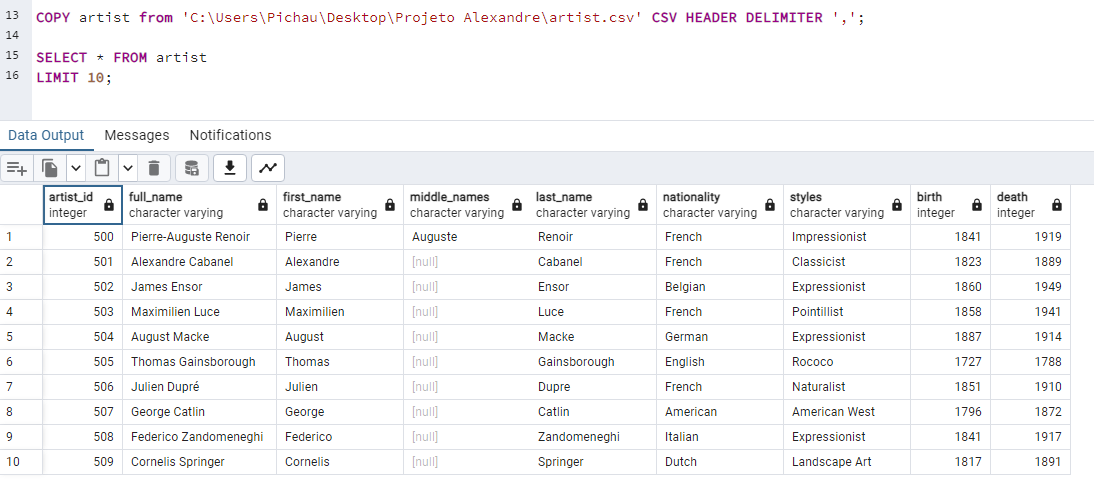

In [2]:
display(Image(filename='select1.png'))

Criando e importando tabela canvas_size para o pgAdmin:
CREATE TABLE canvas_size (
	size_id INTEGER,
	width INTEGER,
	height INTEGER,
	label VARCHAR
	)
	
COPY canvas_size from 'C:\Users\Pichau\Desktop\Projeto Alexandre\canvas_size.csv' CSV HEADER DELIMITER ',';

SELECT * FROM canvas_size --exibindo a tabela criada
limit 10;

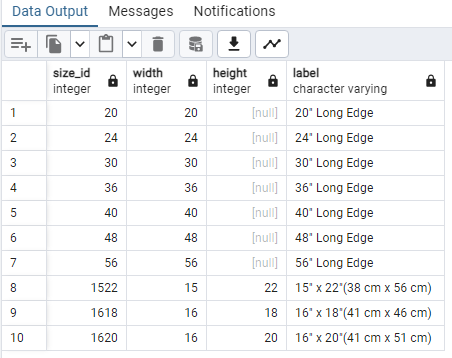

In [4]:
display(Image(filename='select2.png'))

Criando e importando tabela museum para o pgAdmin:
CREATE TABLE museum (
	museum_id INTEGER,
	name VARCHAR,
	address VARCHAR,
	city VARCHAR,
	state VARCHAR,
	postal VARCHAR,
	country VARCHAR,
	phone VARCHAR,
	url VARCHAR
)

COPY museum from 'C:\Users\Pichau\Desktop\Projeto Alexandre\museum.csv' CSV HEADER DELIMITER ',';

SELECT * FROM museum --exibindo a tabela criada
limit 10;

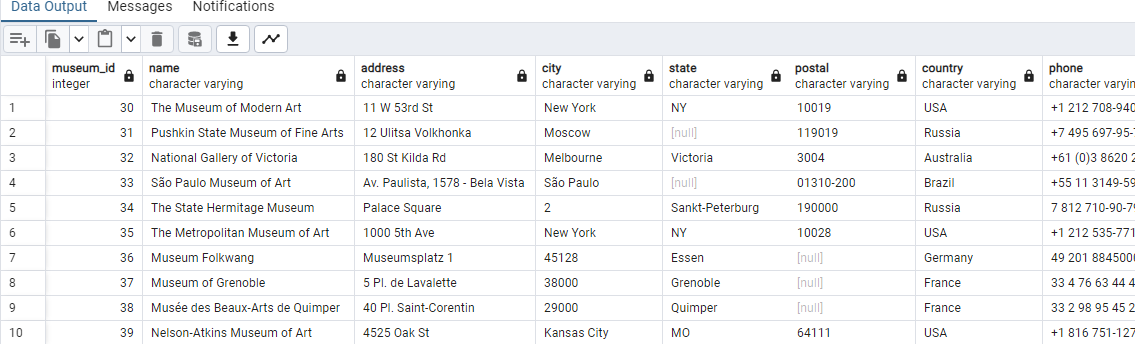

In [5]:
display(Image(filename='select3.png'))

Criando e importando tabela subject para o pgAdmin:
CREATE TABLE subject (
	work_id INTEGER,
	subject VARCHAR)
	
	
COPY subject from 'C:\Users\Pichau\Desktop\Projeto Alexandre\subject.csv' CSV HEADER DELIMITER ',';
	
SELECT * FROM subject --exibindo a tabela criada
limit 10;	

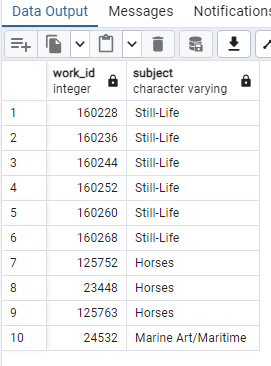

In [6]:
display(Image(filename='select4.png'))

Criando e importando tabela work para o pgAdmin:

CREATE TABLE work (
	work_id INTEGER,
	name VARCHAR,
	artist_id INTEGER,
	style VARCHAR,
	museum_id INTEGER
)
	
COPY work from 'C:\Users\Pichau\Desktop\Projeto Alexandre\work.csv' CSV HEADER DELIMITER ',';

SELECT * FROM work --exibindo a tabela criada
limit 10;


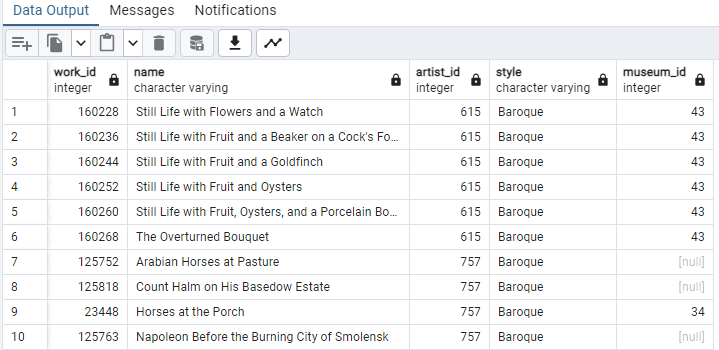

In [7]:
display(Image(filename='select5.png'))

INICIANDO A ANÁLISE DOS DADOS

- Quantos valores nulos temos em cada coluna?

Na tabela artist, temos valores nulos na coluna artist.middle_names. Para contar quantos valores, utilizamos o código:

SELECT COUNT(*) AS total_null_values
FROM artist
WHERE middle_names IS NULL;

Temos 273 valores nulos para esta coluna.




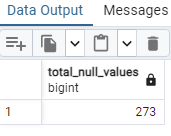

In [19]:
#Saída do código
display(Image(filename='count_null1.png'))

Na tabela canvas_size, temos valores nulos na coluna height. Para contar quantos valores, utilizamos o código:

SELECT COUNT(*) AS total_null_values
FROM canvas_size
WHERE height IS NULL;

Temos 7 valores nulos nesta coluna.



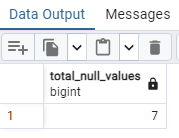

In [20]:
#Saída do código
display(Image(filename='count_null2.png'))

Na tabela museum, temos valores nulos na coluna state. Para contar quantos valores, utilizamos o código:

SELECT COUNT(*) AS total_null_values
FROM museum
WHERE state IS NULL;

Temos 19 valores nulos nesta coluna.


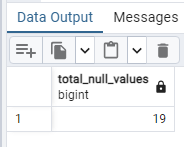

In [21]:
#Saída do código
display(Image(filename='count_null3.png'))

Na tabela work, temos valores nulos na coluna style. Para contar quantos valores, utilizamos o código:

SELECT COUNT(*) AS total_null_values
FROM work
WHERE style IS NULL;

Temos 1286 valores nulos nesta coluna.

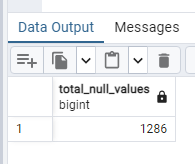

In [22]:
#Saída do código
display(Image(filename='count_null4.png'))

ANÁLISE DOS DADOS / RESPONDENDO PERGUNTAS

Quais países contêm mais artistas?

-- Quais países contêm a maior quantidade de artistas?
SELECT  nationality, COUNT(artist_id) AS quantity FROM artist
GROUP BY nationality
ORDER BY quantity DESC
limit 10;



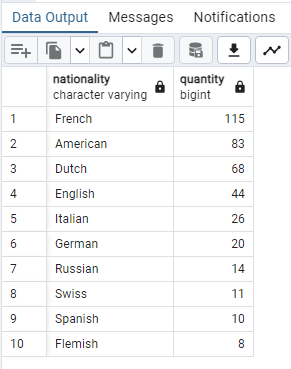

In [24]:
#Saída do código
display(Image(filename='data_out1.png'))

Quais estilos mais frequentes?

-- Quais estilos mais frequentes?
SELECT  styles, COUNT(artist_id) AS quantity FROM artist
GROUP BY styles
ORDER BY quantity DESC
limit 10;

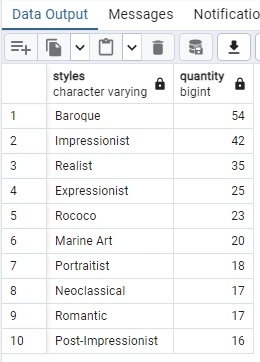

In [25]:
#Saída do código
display(Image(filename='data_out2.png'))

Quais países possuem mais museus?
-- Quais países possuem mais museus?
SELECT  country, COUNT(museum_id) AS quantity FROM museum
GROUP BY country
ORDER BY quantity DESC
LIMIT 10;


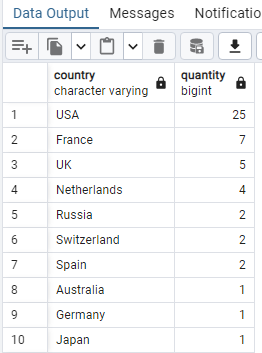

In [26]:
#Saída do código
display(Image(filename='data_out3.png'))

Mais análises, utilizando JOINs.

Verificando quais artistas possuem mais obras, baseando-se nas tabelas artist e work.
-- Quais artistas possuem mais obras?

SELECT  a.full_name as "Nome do artista", COUNT(w.name) as "Contagem de obras"
FROM
artist as a
LEFT JOIN work as w
ON w.artist_id = a.artist_id
GROUP BY a.full_name
ORDER BY COUNT(w.name) DESC
LIMIT 10;



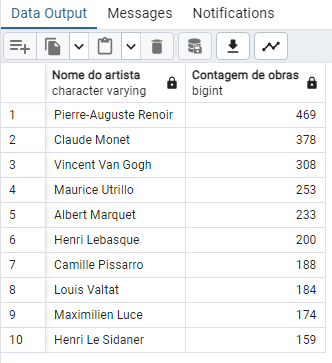

In [29]:
#Saída do código
display(Image(filename='Imagens/join1.png'))

-- Quais museus possuem mais obras?
SELECT  m.name as "Nome do museu", COUNT(w.name) as "Contagem de obras"
FROM
museum as m
LEFT JOIN work as w
ON w.museum_id = m.museum_id
GROUP BY m.name
ORDER BY COUNT(w.name) DESC
LIMIT 10;

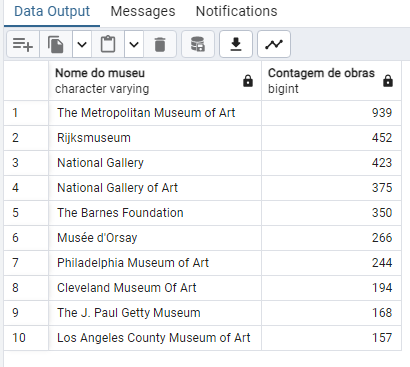

In [30]:
#Saída do código
display(Image(filename='Imagens/join2.png'))

-- Qual a média de obras por artista?
WITH contagem_obras as(
SELECT  a.full_name as "Nome do artista", COUNT(w.name) as "Contagem de obras"
FROM
artist as a
LEFT JOIN work as w
ON w.artist_id = a.artist_id
GROUP BY a.full_name
ORDER BY COUNT(w.name) DESC
)

SELECT AVG("Contagem de obras") FROM contagem_obras



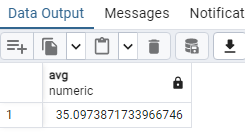

In [31]:
#Saída do código
display(Image(filename='Imagens/join3.png'))

-- Quantos artistas têm entre 150 e 300 obras produzidas?
WITH contagem_obras as(
SELECT  a.full_name as "Nome do artista", COUNT(w.name) as "Contagem de obras"
FROM
artist as a
LEFT JOIN work as w
ON w.artist_id = a.artist_id
GROUP BY a.full_name
ORDER BY COUNT(w.name) DESC
)

SELECT * FROM contagem_obras
WHERE ("Contagem de obras") > 150 AND "Contagem de obras" < 300

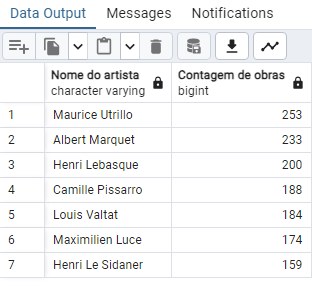

In [32]:
#Saída do código
display(Image(filename='Imagens/join4.png'))